In [ ]:
# ML stroke prediction - Logistic Regression
dataset link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

## Classification of stroke or no-stroke

For the first implementation of Machine Learning on this dataset we are using Logistic Regression

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
np.set_printoptions(suppress=True)

import logistic_regression as lr

import seaborn as sns

import csv
import sys
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
# SKlearn for F1 score calculation
from sklearn.metrics import f1_score

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# we use pandas to import a comma-seperated values dataset
import pandas as pd

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### First importing the dataset and small conversions

For the first implementation we're just using a limited set of features for the model.

In [2]:
#  training data stored in arrays X, y
#df = pd.read_csv(os.path.join('data', 'healthcare-dataset-stroke-data.csv'))
#X = pd.DataFrame(df, columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level']).to_numpy()
#X = np.around(X, 5)
#print("X: ")
#print(X)

#y = pd.DataFrame(df, columns=['stroke']).to_numpy()
#y = np.around(y, 5)
#y.reshape(5110)
#print("y: ")
#print(y)
 
data = pd.read_csv(os.path.join('data', 'healthcare-dataset-stroke-data.csv'))

data.head(10)

data.drop("id", axis = 1, inplace = True)
data.drop("gender", axis = 1, inplace = True)
data.drop("ever_married", axis = 1, inplace = True)
data.drop("work_type", axis = 1, inplace = True)
data.drop("Residence_type", axis = 1, inplace = True)
data.drop("bmi", axis = 1, inplace = True)
data.drop("smoking_status", axis = 1, inplace = True)

print(data)

       age  hypertension  heart_disease  avg_glucose_level  stroke
0     67.0             0              1             228.69       1
1     61.0             0              0             202.21       1
2     80.0             0              1             105.92       1
3     49.0             0              0             171.23       1
4     79.0             1              0             174.12       1
...    ...           ...            ...                ...     ...
5105  80.0             1              0              83.75       0
5106  81.0             0              0             125.20       0
5107  35.0             0              0              82.99       0
5108  51.0             0              0             166.29       0
5109  44.0             0              0              85.28       0

[5110 rows x 5 columns]


## Preprocessing: removing outliers

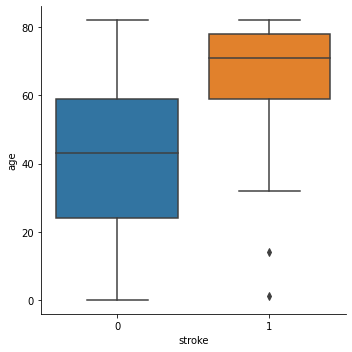

In [3]:
sns.catplot(data=data, x="stroke", y="age", kind="box") #checking for outliers

In [4]:
indexAge = data[((data['age'] < 20) & (data['stroke'] == 1)) ].index  #find the indexes of outliers
data.drop(indexAge , inplace=True) # drop the outliers

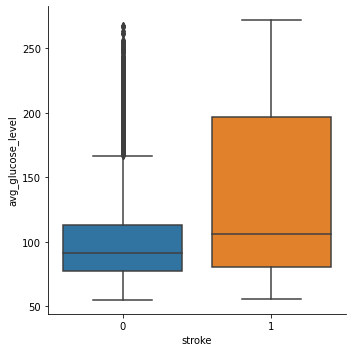

In [5]:
sns.catplot(data=data, x="stroke", y="avg_glucose_level", kind="box")

In [6]:
indexGlucose = data[((data['avg_glucose_level'] > 220) & (data['stroke'] == 0)) ].index
data.drop(indexGlucose , inplace=True)

### Outliers removed

# Downsampling of the dataset before split

In [7]:
negative = data[data.stroke==0]
positive = data[data.stroke==1]

#print(data.stroke.value_counts())

#print(negative.stroke.value_counts())
#print(positive.stroke.value_counts())

# downsample majority
neg_downsampled = resample(negative,
 replace=True, # sample with replacement
 n_samples=len(positive), # match number in minority class
 random_state=27) # reproducible results
# combine minority and downsampled majority
downsampled = pd.concat([positive, neg_downsampled])
# check new class counts
downsampled.stroke.value_counts()

1    247
0    247
Name: stroke, dtype: int64

In [8]:
X = downsampled.drop(['stroke'], axis=1).values
y = downsampled['stroke'].values

# Splitting in train en test set

### preparation of the features
Adding a theta 0 equal to 1

In [9]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

print(X.shape)

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X.shape)
#print(X)

(494, 4)
(494, 5)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0,shuffle=True, stratify=y)
print(X_train.shape)

(395, 5)


# Hierboven maar 1x inladen !!!!

In [11]:
_lambda = 1

### Creating the empty array for theta

In [12]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)
cost, grad = lr.lrCostFunction(initial_theta, X_train, y_train, _lambda)
#print(cost)
#print(grad)

#print(cost.shape)
#print(grad.shape)

### Optimizing the parameters (learning the model)

In [24]:
theta, cost, grad = lr.lrOptimization(lr.lrCostFunction, initial_theta, X_train, y_train, _lambda)

Cost at theta found by optimize.minimize: 0.399
theta:
	[-6.943, 0.092, 1.029, 0.449, 0.013]


In [25]:
p_train = lr.predict(theta, X_train, 0.44)
print('Train Accuracy: {:.2f} %'.format(np.mean(p_train == y_train) * 100))

Train Accuracy: 82.03 %


In [29]:
#for i in range(30, 50):
#    p_train = lr.predict(theta, X_train, (i/100))
#    print("zeker: ", i/100)
#    print(f1_score(y_train,p_train,average='binary'))

In [30]:
print("op de training set")
print(f1_score(y_train,p_train,average='binary'))

op de training set
0.8049382716049382


# F1 score op test_set

In [18]:
p_test = lr.predict(theta, X_test, 0.44)
print("op de test set")
print(f1_score(y_test,p_test,average='binary'))

op de test set
0.8118811881188118


In [19]:
#for i in range(30, 50):
#    p_test = lr.predict(theta, X_test, (i/100))
#    print("zeker: ", i/100)
#    print(f1_score(y_test,p_test,average='binary'))

## Beste score tot nu toe op de test set:
## 83.3 voor een decision boundary van 0.35 zonder outliers
## 81.18 voor een decision boundary van 0.44 met outliers